In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x1, y1 = np.unique(y_train, return_counts=True)

In [5]:
# labels
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
# frequency distribution
y1

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

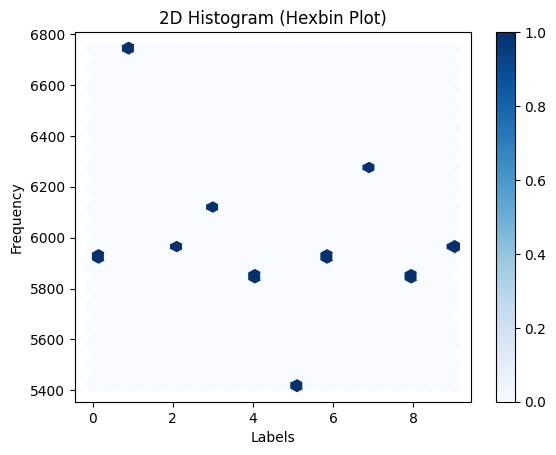

In [7]:
plt.hexbin(x1, y1, gridsize=30, cmap='Blues')

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('2D Histogram (Hexbin Plot)')

# Adding colorbar
plt.colorbar()

# Display the plot
plt.show()

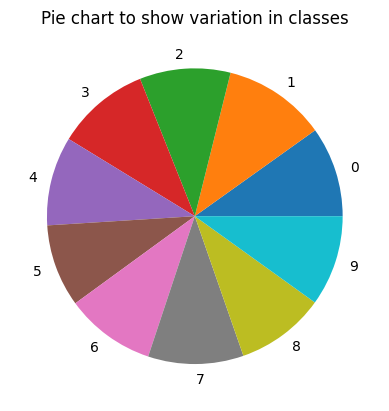

In [8]:
plt.pie(y1, labels = x1)
plt.title("Pie chart to show variation in classes")
plt.show()

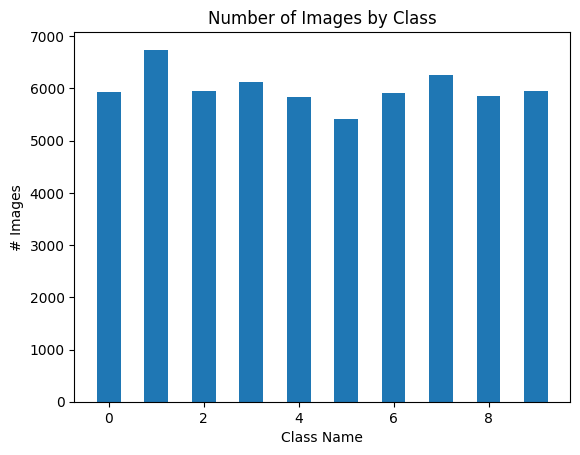

In [9]:
plt.bar(x1, y1, width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

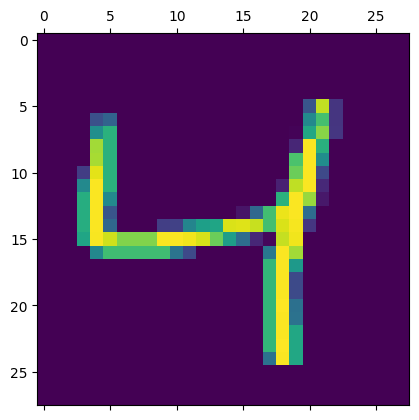

In [10]:
plt.matshow(x_train[2])

In [11]:
#Scaling
x_train = x_train / 255
x_test = x_test / 255

In [12]:
# flattening the data
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
history = model.fit(x_train_flattened, y_train, epochs=10, validation_split=0.05)

test_loss, test_acc = model.evaluate(x_test_flattened, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1782/1782 [==============================] - 15s 6ms/step - loss: 0.2787 - accuracy: 0.9213 - val_loss: 0.1180 - val_accuracy: 0.9690
Epoch 2/10
1782/1782 [==============================] - 9s 5ms/step - loss: 0.1239 - accuracy: 0.9633 - val_loss: 0.0883 - val_accuracy: 0.9777
Epoch 3/10
1782/1782 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9737 - val_loss: 0.0808 - val_accuracy: 0.9817
Epoch 4/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9794 - val_loss: 0.0747 - val_accuracy: 0.9797
Epoch 5/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0715 - val_accuracy: 0.9817
Epoch 6/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0886 - val_accuracy: 0.9777
Epoch 7/10
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0738 - val_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9777
Test accuracy: 0.9776999950408936


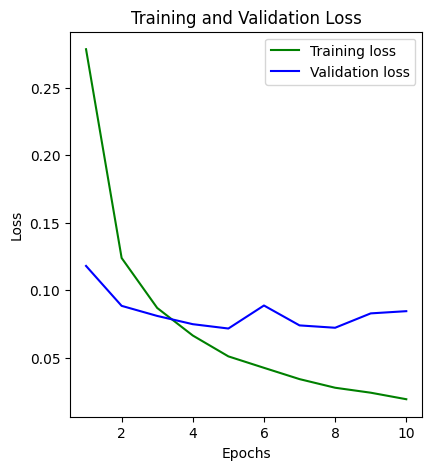

In [15]:
test_loss, test_acc = model.evaluate(x_test_flattened, y_test)
print(f"Test accuracy: {test_acc}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

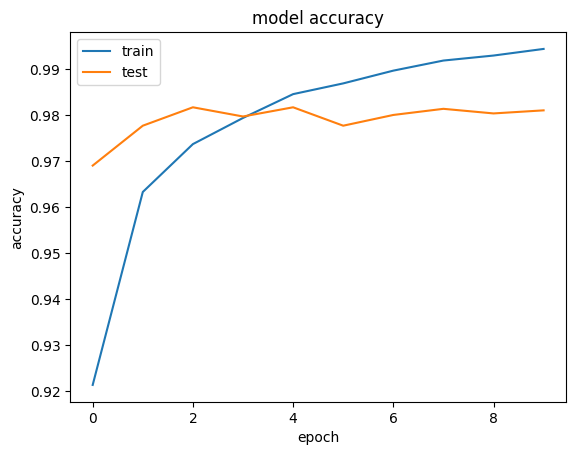

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

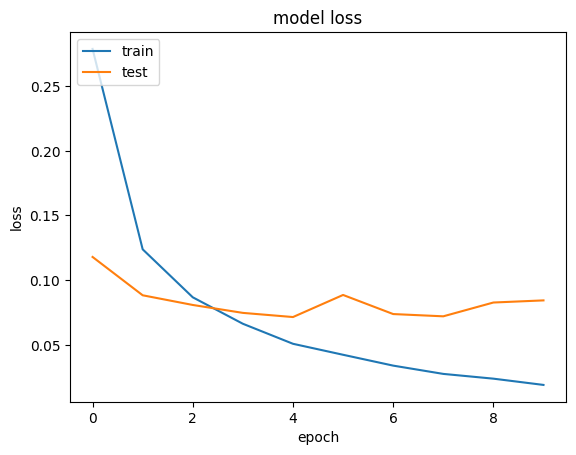

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9777


[0.07300636917352676, 0.9776999950408936]

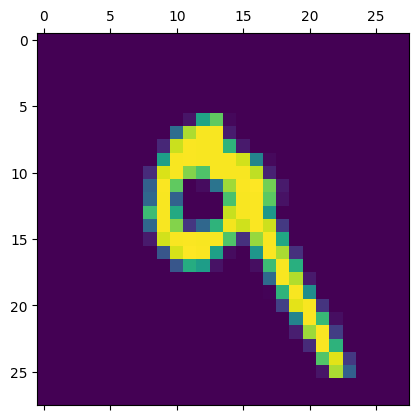

In [19]:
plt.matshow(x_test[7])

In [20]:
y_predicted = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_predicted[7]

array([3.1245953e-08, 8.3574455e-04, 3.2783881e-02, 1.5158567e-01,
       5.0740737e-02, 7.3153269e-04, 4.5679545e-08, 4.2568255e-02,
       3.3906912e-05, 9.9995720e-01], dtype=float32)

An output in the form of probabilities for each class is obtained. We take the class with the highest probability to be our answer

In [22]:
np.argmax(y_predicted[7])

9

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    2,    2,    6,    1,    3,    1],
       [   0, 1121,    3,    1,    0,    1,    4,    2,    3,    0],
       [   4,    0,  998,    2,    1,    0,    7,    6,   14,    0],
       [   0,    1,    1,  994,    0,    5,    0,    3,    4,    2],
       [   1,    1,    4,    0,  954,    0,   10,    3,    0,    9],
       [   2,    0,    0,    6,    1,  866,    8,    1,    6,    2],
       [   3,    3,    1,    0,    1,    2,  947,    1,    0,    0],
       [   1,    5,    6,    1,    0,    0,    0, 1009,    2,    4],
       [   4,    1,    2,    3,    3,    2,    6,    3,  947,    3],
       [   2,    3,    0,    6,    5,    4,    1,    6,    5,  977]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

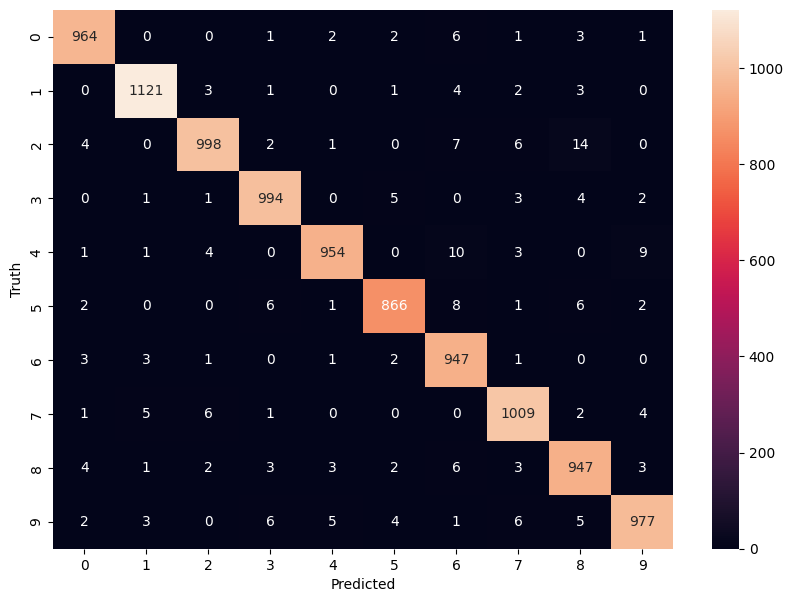

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')